In [1]:
intro_images_path='./Images/Intro_images/'
edge_images_path='./Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='../'#../Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2024/25


<img src="./Logotipo_Solo.png" width=200/>

## 1 Edge Detection

- Image gradients
- Noise effect and smoothing
- Derivative of Gaussian filter
- Canny edge detector
- Lapacian
- Hough transform

http://szeliski.org/Book/


### Exercise Image gradients

OpenCV provides three types of derivate (high-pass) filters: Sobel, Scharr and Laplacian.
Repeat the first exercises on this page:
https://docs.opencv.org/4.3.0/d5/d0f/tutorial_py_gradients.html
https://docs.opencv.org/3.4.2/d5/d0f/tutorial_py_gradients.html



#### First deriative filters: Sobel and Scharr

The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less resistant to noise.

    dst= cv.Sobel(src, ddepth, dx, dy, [, ksize[, scale[, delta[, borderType]]]])

You can specify the direction of derivatives to be taken, vertical or horizontal( passing values {0,1} as arguments of dx and dy respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.
Gradient filters can also be applied using the cv2.Filter2D() function. The following are the 3x3 kernels corresponding to  first x-  and  y- image derivatives: bare derivative without Gaussian smoothing, Sobel and Scharr.


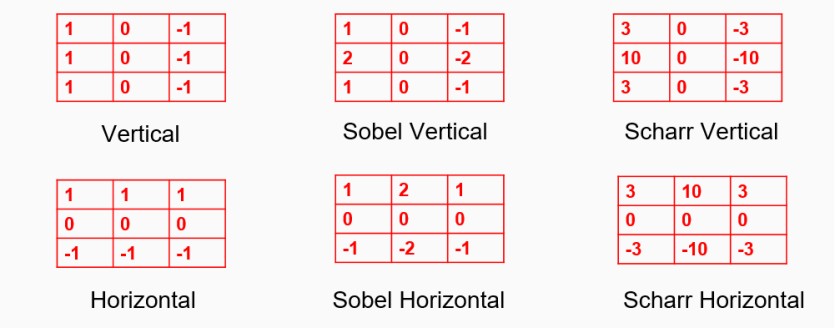


#### Second derivative filters: Laplacian

The Laplacian is the sum of the second partial derivatives. Opencv has the **cv2.laplacian()** function that implements the derivatives using the chain rule and Sobel filters.

    dst= cv2.Laplacian(src, ddepth,[ksize[, scale[, delta[, borderType]]]])

    If ksize == 1 (default), then following kernel is used for filtering:
    K=[[0, 1, 0]
       [1,-4, 1]
       [0, 1, 1]]

Below code shows all operators in a single diagram. All kernels are 3x3. Depth of output image is passed to get the result in np.uint8 type.

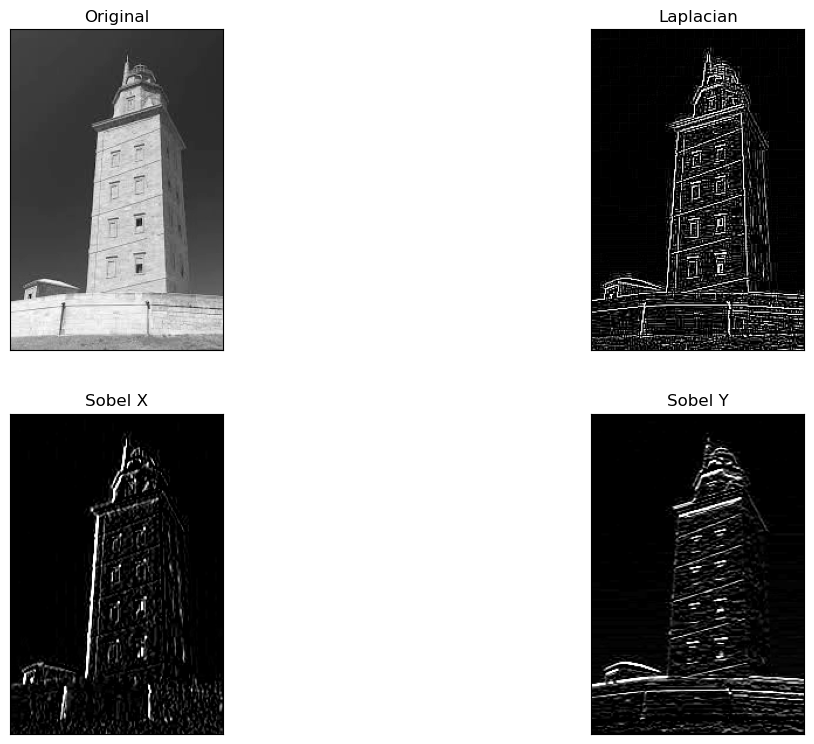

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)
sobelx = cv2.Sobel(img, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U,0,1,ksize=3)

plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

**IMPORTANT!**

Output datatype can be cv2.CV_8U or np.uint8, but there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.
If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_64F, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.




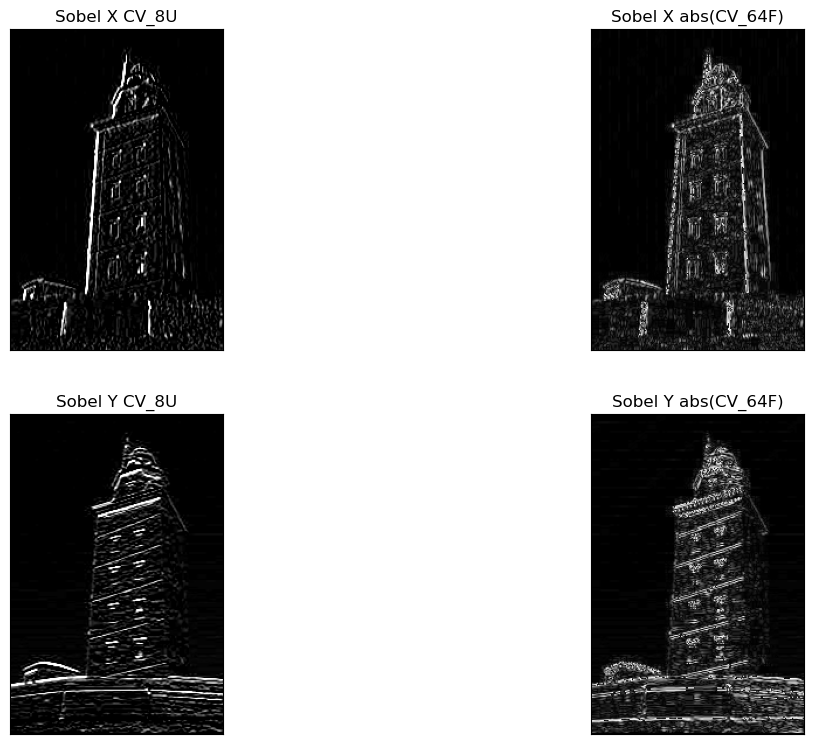

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely8u = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U to visualze ite
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobelx64f = np.absolute(sobelx64f)
sobelx64f_to_8u = np.uint8(abs_sobelx64f)
abs_sobely64f = np.absolute(sobely64f)
sobely64f_to_8u = np.uint8(abs_sobely64f)

plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))

plt.subplot(2,2,1),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel X CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx64f_to_8u,cmap = 'gray')
plt.title('Sobel X abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(sobely8u,cmap = 'gray')
plt.title('Sobel Y CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely64f_to_8u,cmap = 'gray')
plt.title('Sobel Y abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

### Exercise Canny edge detector

https://docs.opencv.org/4.3.0/da/d22/tutorial_py_canny.html
https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html

Canny algorithm was designed to meet the criteria of  good detection,  good location and single response. It uses multiple stages, as shown  below. OpenCV implements it as the function  cv2.Canny().

**edges = cv2.Canny(image, threshold1, threshold2[,edges [,apertureSize[, L2gradient]]])
    
- First argument is the input image. 
- Second and third arguments are the thresholds. 
  The former (lowest) is used for edge linking. 
  While threshold2 (highest) is used to find initial segments of strong edges. 
- Argument apertureSize is the size of Sobel kernel used for computing image gradients. By default it is 3. 
- Last argument is L2gradient which specifies the equation for measuring gradient magnitude. If it is True, L2 norm is used, which is usually more accurate. By default, it is False and L1 norm is used.


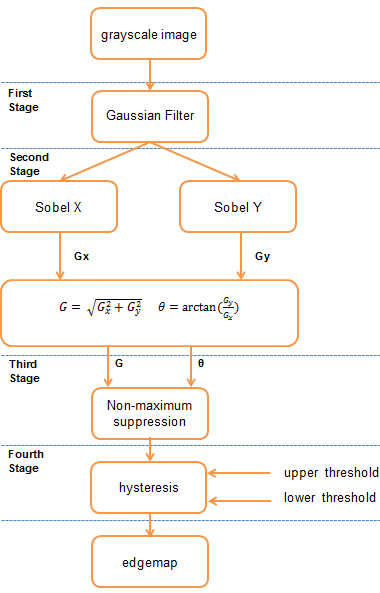


You can find a detailed implementation of the Canny detector here: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

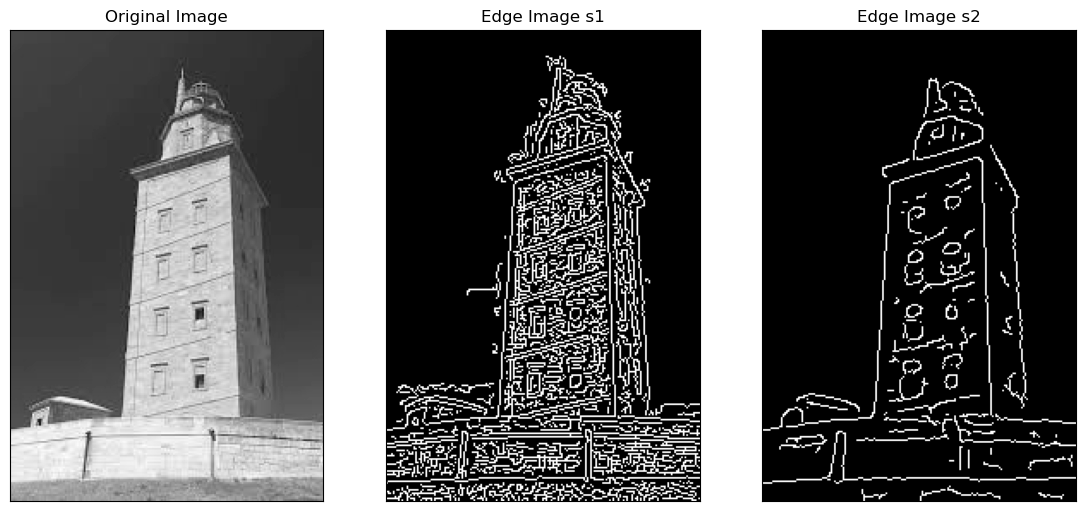

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(edge_images_path+'hercules_tower.jpg',0)

img=cv2.GaussianBlur(image,(3,3),0) #some previous smothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.figure(figsize=(0.05*img.shape[0],0.05*img.shape[1]))
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(15,15),0) #some previous smothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()

#### Exercise

Select the best values for threshold1, threshold2, kernel size (or gaussian sigma), for each of the following images: chuvia.jpg, xardin.jpg, paseo.jpg.


* kernel size and sigma are dependent values. Commonly, Gaussian distribution has 99.7% of its probability mass within $3*sigma$, so the size of the kernel should be $k\_size = 6.0*sqrt(2)*sigma$. Anyway $k\_size = 6*sigma$, or even shorter, is usually enough.
        
* Specific implementation in OpenCV estimate the value of sigma (if 0 is passed) given the value of kernel size, but not the other way around. You can find the relationship between these two parameters (according to opencv) here: 

    https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#getgaussiankernel


---
---

#### EXERCISE 1

Compare the following two template matching alternatives  regarding their  performance : (i) case of using image and template gray-levels as features for matching, and  (ii) case of using their edge maps as features. Use faces.jpg and two different templates right_eye.jpg and right_eye_i.jpg. You  will have to compute their edge maps to perform the matching in case (ii).

---
---

In [8]:
#SOLUTION HERE

### Image blending using Gaussian and Laplacian Pyramids


#### Gaussian Pyramids

This type of pyramid is constructed by repeatedly applying a Gaussian blur filter to an image and downsampling it by a factor of two. The resulting images are smoother and have lower resolution than the original image because Gaussians are low pass filters.

#### Laplacian Pyramid

A Laplacian pyramid is very similar to a Gaussian pyramid, but saves the difference image of the blurred versions between each levels (Difference of Gaussians approximates Laplacian of Gaussian operator). The resulting images are band-pass filtered versions of the original image, which highlight details and edges at different levels of resolution. Only the smallest level is not a difference image.

<img src="./LoG.jpg" width=400/> <img src="./DoG.jpg" width=400/>



#### Image Blending

- Choose img1 and img2 and crop/resize to the same size
- Chose a region mask of the same size
- Create Gaussian pyramid for img1 and img2
- Create Laplacian pyramids from Gaussian pyramids
- Create Gaussian pyramid for the region mask
- Blend the two Laplacian pyramids using the mask’s Gaussian pyramid to weight the two images at each level of the pyramid
- Collapse the resulting Laplacian pyramid to reveal the blended image.

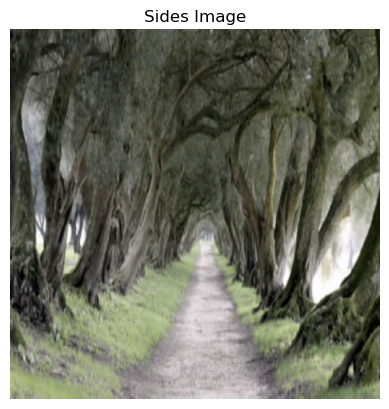

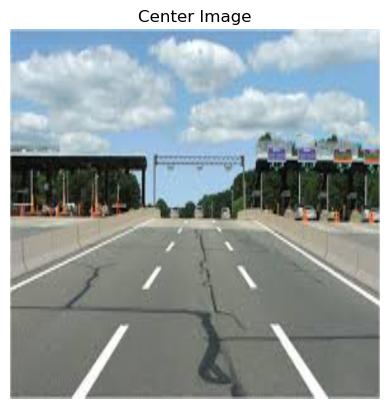

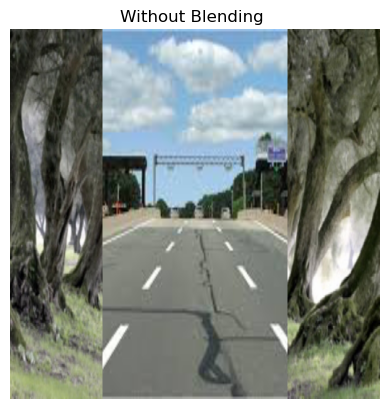

In [9]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

def imshow2(im_title, im):
    ''' This is function to display the image'''
    plt.figure();
    plt.title(im_title);
    plt.axis("off");
    if len(im.shape) == 2:
        plt.imshow(im, cmap = "gray");
    else:
        im_display = cv2.cvtColor(im, cv2.COLOR_RGB2BGR);
        plt.imshow(im_display);
    plt.show();
    
    
# Load the display the images
im_sides = cv2.imread(edge_images_path+'paseo.jpg').astype(np.float32)
im_center = cv2.imread(edge_images_path+'road2.jpg').astype(np.float32)

im_sides = cv2.resize(im_sides, (512, 512))
im_center = cv2.resize(im_center, (512, 512))
imshow2("Sides Image", im_sides/255);
imshow2("Center Image", im_center/255);

cols=512
#imshow2("Without Blending ", np.hstack((im_sides[:, :int(cols/3)], im_center[:, int(cols/3):int(2*cols/3)],
#                        im_sides[:,int(2*cols/3):])))

im_mask=np.ones((512,512,3),np.float32)
im_mask[:, int(cols/4):int(3*cols/4)]=0
imshow2("Without Blending ",(im_mask*im_sides+ (1-im_mask)*im_center)/255)

In [10]:
# Compute the Gaussian Pyramids
gauss_levels = 6;
gauss_reduce_sides = im_sides.copy()
gauss_pyr_sides = [gauss_reduce_sides]
gauss_reduce_center = im_center.copy()
gauss_pyr_center = [gauss_reduce_center]

gauss_reduce_mask=im_mask.copy()
gauss_pyr_mask=[gauss_reduce_mask]

for i in range(gauss_levels):
    gauss_reduce_sides = cv2.pyrDown(gauss_reduce_sides)
    gauss_pyr_sides.append(gauss_reduce_sides)
    
    gauss_reduce_center = cv2.pyrDown(gauss_reduce_center)
    gauss_pyr_center.append(gauss_reduce_center)
    
    gauss_reduce_mask = cv2.pyrDown(gauss_reduce_mask)
    gauss_pyr_mask.append(gauss_reduce_mask)


# Compute the Laplacian Pyramids
lap_pyr_sides = []
lap_pyr_center = []

for i in range(1, gauss_levels+1):
    h, w = gauss_pyr_sides[i-1].shape[:2];
    sides_append = cv2.subtract(gauss_pyr_sides[i-1], cv2.pyrUp(gauss_pyr_sides[i], dstsize=(w, h)));
    center_append = cv2.subtract(gauss_pyr_center[i-1], cv2.pyrUp(gauss_pyr_center[i], dstsize=(w, h)));
    lap_pyr_sides.append(sides_append)
    lap_pyr_center.append(center_append)

'''
# Display the pyramids 
for index, image in enumerate(gauss_pyr_sides):
    imshow2("Level {}".format(index), image)
for index, image in enumerate(lap_pyr_sides):
    imshow2("Level {}".format(index), image)  
'''

pass

(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
Lowest Laplacian level (16, 16, 3)
Lowest Gaussian level (8, 8, 3)


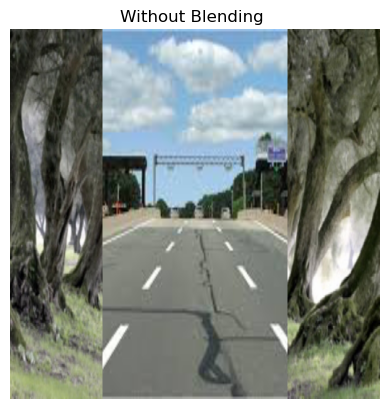

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


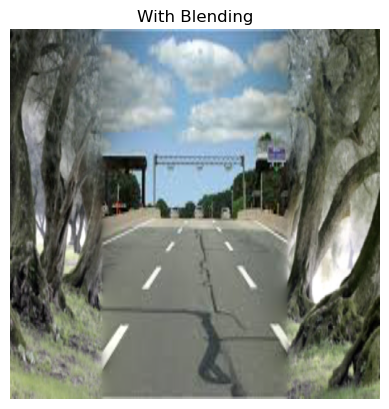

In [11]:
# Combine the images
com_lap = [];
for sides, center, mask in zip(lap_pyr_sides, lap_pyr_center, gauss_pyr_mask):
    print(sides.shape)
    sides=mask*sides
    center=(1-mask)*center
    
    com_lap.append(sides+center)
# Display the combined images
# Uncomment to see the Laplacian Pyramid
#for index, image in enumerate(com_lap):
#    imshow2("Level {}".format(index), image) 

print("Lowest Laplacian level {}".format(lap_pyr_sides[-1].shape))
print("Lowest Gaussian level {}".format(gauss_pyr_mask[-1].shape))

# Now reconstruct
cols = gauss_pyr_sides[-2].shape[1]
im_blended=gauss_pyr_mask[-1]*gauss_pyr_sides[-1]+ (1-gauss_pyr_mask[-1])*gauss_pyr_center[-1]

for i in range(len(com_lap)-1, -1, -1):
    h, w = com_lap[i].shape[:2];
    im_blended = cv2.pyrUp(im_blended, dstsize=(w, h))
    im_blended = cv2.add(im_blended, com_lap[i])

# Display the Images
cols=im_sides.shape[1]

imshow2("Without Blending ",(im_mask*im_sides+ (1-im_mask)*im_center)/255)
imshow2("With Blending", im_blended/255)


### Image Fusion

Differently exposed images look very different in terms of brightness as well as details on the images. As the image went underexposed, the image becomes dark and lose details on the darker region, whereas the image becomes too bright and also lose details on the brighter region as become overexposed. To capture all details on the image, they needs to be improved by combining them.

Usig a multiresolution blending, by constructing Gaussian and Laplacian image pyramids, a improved image can be built from images of the same scene (and camera pose) attending to different quality measures, for instance saturation. The Saturation measures the degree of the exposure. A longer exposed image contains saturated colors, which will eventually be clipped off. Saturation can be measured at pìxel level as teh standar deviation of R, G, and B at each pixel.

Image fusion can be obtained from the two image laplacian pyramids, which will be combined according to the weights provided by the gaussian pyramid of the saturation map.


---
---

### EXERCISE 2

Write the code for the fusion of these two images **landscape_under.png** and **landscape_over.png**, according to the measure of saturation at pixel level im both images.

---
---

---
---

### Exercise Hough Tranform

https://docs.opencv.org/3.4.2/d6/d10/tutorial_py_houghlines.html

A line in image space can be expressed with two parameters:
- In the Cartesian coordinate system:  (m,b).
- In the Polar coordinate system: (r,θ)
For Hough Transforms, we will express lines in the Polar system. Hence, a line equation can be written as   r=xcosθ+ysinθ. In general for each point (x0,y0), we can define the family of lines that goes through that point as  r=x0cosθ+y0sinθ. Meaning that each pair (r,θ) represents each line that passes by (x0,y0).

Hough Transform is encapsulated in the OpenCV function cv2.HoughLines().

    lines=cv.HoughLines(edges, rho, theta, threshold [, srn[, stn[, min_theta[,max_theta]]]]])
    
- It simply returns an array of (r,θ) values; r is measured in pixels and θ  is measured in radians. 
- First parameter, edges image should be a binary image, so apply threshold or use canny edge detection before applying Hough transform. 
- Second and third parameters are rho and theta accuracies, respectively. 
- Fourth argument is the threshold, which means minimum votes it should get for it to be considered as a line. Remember, number of votes depend upon number of points detected on the line.

In [ ]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'building.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=img
imgP=img.copy()

gray = cv2.GaussianBlur(img,(7,7),0)
edges = cv2.Canny(gray,1,50,apertureSize=3,L2gradient=True)
lines = cv2.HoughLines(edges,1,np.pi/180,120)

#Draw all the lines
if lines is not None:
    for i in range(0,len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(imgP, pt1, pt2, (0,0,255), 2)

plt.imshow(edges,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imgP,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

A  more efficient implementation of the Hough Line Transform is the function **HoughLinesP()**.
It returns the extremes of  detected lines (x0,y0,x1,y1). This function has two extra parameters:

- MinLineLength: Minimum line length. Line segments shorter than it are rejected.
- MaxLineGap: Maximum allowed gap between points on the same line to link them.


In [ ]:
ContrastlinesP = cv2.HoughLinesP(edges,1,np.pi/180,50,
                 minLineLength=50,maxLineGap=10)

imgP=img.copy()

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)

plt.imshow(imgP)
plt.show()


---
---

### EXERCISE 3

Consider the image naval.jpg. Try to detect lines with the best trade-off between the numbers of True Positive lines and False Negative ones. Consider different levels of smoothing when applying Canny detector.

---
---

In [ ]:
#SOLUTION HERE

### Exercise: Hough Transform applied to circles

https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

A circle is represented mathematically by its center *(xcenter,ycenter)* and its radius *r*. As it has 3 parameters, we need a 3D accumulator for hough transform. OpenCV offers the function **cv2.HoughCircles()**.

        circles= cv2.HoughCircles(image, method, dp, minDist[, param1[, param2[, minRadius[, maxRadius]]]])
        
- **image**	8-bit, single-channel, grayscale input image.
- **circles**	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes).
- **method** Detection method. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT. 
- **dp** Inverse ratio of the accumulator resolution to the image resolution: if dp=1 the accumulator has the same resolution as the input image; if dp=2 the accumulator has half as big width and height. 
- **minDist**	Minimum distance between the centers of the detected circles.
- **param1** Higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). 
- **param2** Accumulator threshold for the circle centers at the detection stage. 
- **minRadius**	Minimum circle radius.
- **maxRadius**	Maximum circle radius. 

In [ ]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread('spec2.tif',0)#edge_images_path+'faces.jpg',0)
img = cv2.GaussianBlur(img,(9,9),2)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=20, param1=40,param2=30,minRadius=10,maxRadius=20)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()


---
---

### EXERCISE 4

Implement a program for the estimation of the number of fishes in fishes.jpg image, according to the number of detected eyes. Choose the most convenient parameters.

---
---

In [ ]:
#SOLUTION HERE